In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn
import impyute

In [70]:
#INPUT DATA
data =pd.read_csv('train_data_with_new_features.csv') 
Test_data = pd.read_csv('test_data_with_new_features.csv') 

In [71]:

data["Gender"]=data["Gender"].replace('M',1,regex=True) #Male = 1
data["Gender"]=data["Gender"].replace('F',0,regex=True) #Female =0


data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


data["AGE"]=data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('31-45',2,regex=True) #Female =0
data["AGE"]=data["AGE"].replace('46-65',3,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('More than 65',4,regex=True) #Female =0

data['Gender']= data['Gender'].apply(pd.to_numeric)
data['MARITAL_STATUS']= data['MARITAL_STATUS'].apply(pd.to_numeric)
data['EDUCATION_STATUS']= data['EDUCATION_STATUS'].apply(pd.to_numeric)
data['AGE']= data['AGE'].apply(pd.to_numeric)


for  i  in range(data["Balance_Limit_V1"].count()):
    if  type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'M' :
       
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'K' :
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1]))
        
data['Balance_Limit_V1']= data['Balance_Limit_V1'].apply(pd.to_numeric)

Data=data
Data.dtypes

Client_ID              object
Balance_Limit_V1        int64
Gender                  int64
EDUCATION_STATUS        int64
MARITAL_STATUS          int64
AGE                     int64
PAY_JULY                int64
PAY_AUG                 int64
PAY_SEP                 int64
PAY_OCT                 int64
PAY_NOV                 int64
PAY_DEC                 int64
DUE_AMT_JULY            int64
DUE_AMT_AUG             int64
DUE_AMT_SEP             int64
DUE_AMT_OCT             int64
DUE_AMT_NOV             int64
DUE_AMT_DEC             int64
PAID_AMT_JULY           int64
PAID_AMT_AUG            int64
PAID_AMT_SEP            int64
PAID_AMT_OCT            int64
PAID_AMT_NOV            int64
PAID_AMT_DEC            int64
NEXT_MONTH_DEFAULT      int64
PAY_TREND               int64
ADVNC_TREND             int64
BALANCE               float64
ZERO_PAID               int64
ZERO_DUE                int64
dtype: object

In [72]:

Test_data["Gender"]=Test_data["Gender"].replace('M',1,regex=True) #Male = 1
Test_data["Gender"]=Test_data["Gender"].replace('F',0,regex=True) #Female =0


Test_data["Balance_Limit_V1"]=Test_data["Balance_Limit_V1"].replace('M','000000',regex=True) #M = 000000
Test_data["Balance_Limit_V1"]=Test_data["Balance_Limit_V1"].replace('K','000',regex=True)    #K = 000


Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


Test_data["AGE"]=Test_data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('31-45',2,regex=True) #Female =0
Test_data["AGE"]=Test_data["AGE"].replace('46-65',3,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('More than 65',4,regex=True) #Female =0

Test_data['Gender']= Test_data['Gender'].apply(pd.to_numeric)
Test_data['MARITAL_STATUS']= Test_data['MARITAL_STATUS'].apply(pd.to_numeric)
Test_data['EDUCATION_STATUS']= Test_data['EDUCATION_STATUS'].apply(pd.to_numeric)
Test_data['AGE']= Test_data['AGE'].apply(pd.to_numeric)

for  i  in range(Test_data["Balance_Limit_V1"].count()):
    if  type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'M' :
       
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'K' :
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1]))
        
Test_data['Balance_Limit_V1']= Test_data['Balance_Limit_V1'].apply(pd.to_numeric)

Test_Data=Test_data
Test_Data.dtypes

Client_ID            object
Balance_Limit_V1    float64
Gender                int64
EDUCATION_STATUS      int64
MARITAL_STATUS        int64
AGE                   int64
PAY_JULY              int64
PAY_AUG               int64
PAY_SEP               int64
PAY_OCT               int64
PAY_NOV               int64
PAY_DEC               int64
DUE_AMT_JULY          int64
DUE_AMT_AUG           int64
DUE_AMT_SEP           int64
DUE_AMT_OCT           int64
DUE_AMT_NOV           int64
DUE_AMT_DEC           int64
PAID_AMT_JULY         int64
PAID_AMT_AUG          int64
PAID_AMT_SEP          int64
PAID_AMT_OCT          int64
PAID_AMT_NOV          int64
PAID_AMT_DEC          int64
PAY_TREND             int64
ADVNC_TREND           int64
BALANCE             float64
ZERO_PAID             int64
ZERO_DUE              int64
dtype: object

In [66]:
Test_Data.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'PAY_TREND', 'ADVNC_TREND', 'BALANCE', 'ZERO_PAID',
       'ZERO_DUE'],
      dtype='object')

In [73]:
from sklearn.preprocessing import StandardScaler
z=[]


df_mix = Data.append(Test_Data) 


highCo=[ 'ADVNC_TREND','Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC']
len(highCo)

subData = df_mix.loc[:,highCo]



# scaler = StandardScaler( with_mean=True, with_std=True)

# subData.describe()

Std_Data=(subData-subData.mean())/subData.std()





Std_data_Train=Std_Data.head(24000)
Std_Data_Train = Std_data_Train.join(Data["NEXT_MONTH_DEFAULT"])

Std_Data_Test=Std_Data.tail(6000)

corrMatrix = Std_Data_Train.corr()
cls=(abs(corrMatrix['NEXT_MONTH_DEFAULT']))
print(sum(cls))


3.500348938603552


In [25]:
Std_Data_Train.describe()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,-0.376576,-0.002521,0.000525,-0.000234,0.003913,0.002217,0.003111,0.006294,0.004384,0.004442,...,0.002825,0.004683,0.003975,0.005844,0.003548,0.000536,0.002128,0.002497,0.006171,0.222083
std,0.001726,1.000536,1.000298,1.000025,0.998769,1.000974,1.002823,1.001677,0.997835,0.998824,...,1.002679,1.009239,1.008386,1.028652,1.061278,0.999684,1.001605,1.021192,1.030988,0.415656
min,-0.378371,-1.234302,-0.960795,-1.093761,-1.230024,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-3.314993,-2.000844,-6.355142,-0.341936,-0.256985,-0.296797,-0.308058,-0.314131,-0.293377,0.000000
25%,-0.377943,-1.234302,-0.960795,-1.093761,-1.230024,-0.874977,-0.723558,-0.696652,-0.666588,-0.647554,...,-0.635954,-0.633286,-0.631539,-0.281562,-0.220235,-0.274644,-0.288908,-0.296847,-0.285902,0.000000
50%,-0.377087,0.810147,0.144117,0.914246,0.201457,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.375700,-0.364966,-0.366248,-0.213346,-0.169685,-0.193605,-0.212310,-0.215953,-0.209001,0.000000
75%,-0.374521,0.810147,1.249029,0.914246,0.201457,0.014860,0.111734,0.138862,0.188743,0.234913,...,0.181938,0.169515,0.179120,-0.038626,-0.039980,-0.035536,-0.049414,-0.047463,-0.068069,0.000000
max,-0.368105,0.810147,1.249029,0.914246,3.064418,7.133555,6.794071,6.822977,7.031387,7.294645,...,13.186469,14.587189,15.495024,52.398339,72.841765,50.594430,39.331526,27.044274,29.444595,1.000000


In [74]:
Std_Data_Test

,ADVNC_TREND,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,-0.536704,1.759959,0.810147,-0.960795,-1.093761,0.201457,0.014860,0.111734,0.138862,0.188743,...,0.123071,1.421608,1.841840,1.907482,0.016390,-0.016193,4.514883,1.163280,0.174806,0.022967
1,-0.536704,0.476704,-1.234302,-0.960795,-1.093761,0.201457,0.014860,0.111734,0.138862,0.188743,...,-0.104730,-0.038735,0.029205,0.076188,-0.243769,-0.184800,-0.201154,-0.180394,-0.183227,-0.180875
2,0.106672,1.332207,0.810147,-0.960795,0.914246,-1.230024,-0.874977,-0.723558,1.809891,0.188743,...,-0.621837,-0.596488,-0.594969,-0.645495,-0.160813,-0.256985,-0.240001,-0.308058,-0.248679,0.682127
3,0.106672,-0.378792,0.810147,1.249029,-1.093761,0.201457,0.904697,-0.723558,-0.696652,-1.521918,...,-0.641868,-0.672486,-0.663048,-0.652713,-0.191000,-0.148482,-0.296797,-0.308058,-0.314131,-0.293377
4,-0.536704,0.048953,-1.234302,0.144117,0.914246,-1.230024,0.014860,0.111734,-1.532166,-1.521918,...,-0.677918,-0.672486,-0.663048,-0.652713,-0.341936,-0.256985,-0.296797,-0.308058,-0.314131,-0.293377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.536704,3.898716,0.810147,0.144117,0.914246,0.201457,0.014860,0.111734,0.138862,0.188743,...,2.586699,2.491699,2.720826,2.699384,0.231622,0.177026,0.106453,0.170681,0.208835,0.100380
5996,-0.536704,-0.378792,-1.234302,1.249029,-1.093761,0.201457,-0.874977,-0.723558,-0.696652,-1.521918,...,-0.677918,-0.672486,-0.655464,-0.652764,-0.311435,-0.256985,-0.296797,-0.278629,-0.313933,-0.293377
5997,-0.536704,0.904456,0.810147,-0.960795,-1.093761,0.201457,0.014860,0.111734,0.138862,0.188743,...,-0.181604,-0.100010,-0.036701,0.026236,-0.193404,-0.170183,-0.126409,-0.180394,-0.117774,-0.012122
5998,0.106672,0.476704,0.810147,0.144117,-1.093761,1.632938,-0.874977,1.782318,-0.696652,0.188743,...,-0.455854,-0.439324,-0.416325,-0.400842,-0.341936,0.411392,-0.296797,-0.308058,-0.314131,-0.287752


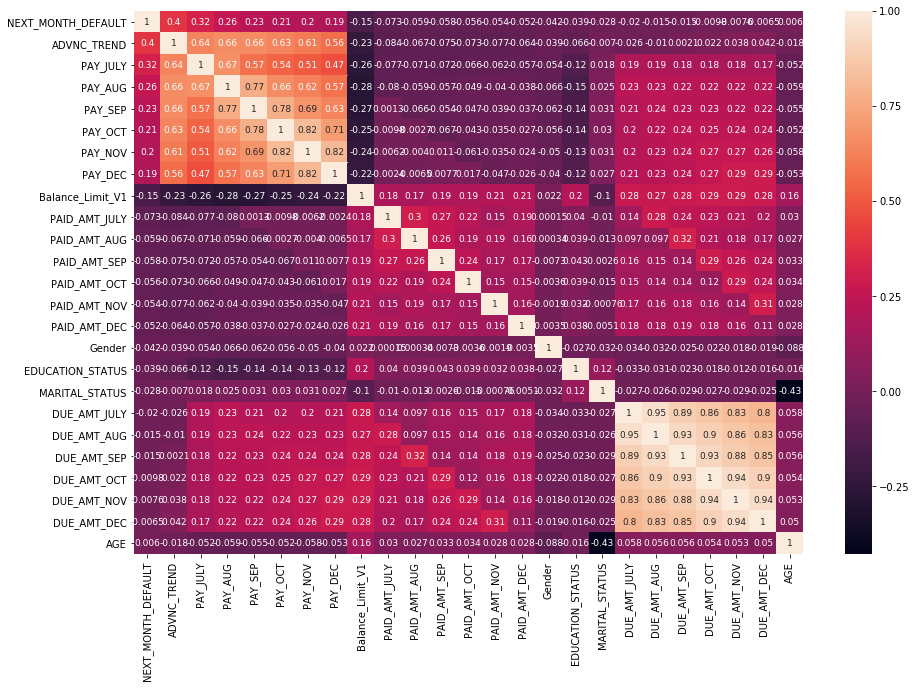

In [75]:
from pandas import DataFrame
import seaborn as sn

corrMatrix = Std_Data_Train.corr()
cls=(abs(corrMatrix['NEXT_MONTH_DEFAULT']))
p=cls.sort_values(ascending=False)

t=p.index

df = DataFrame(Std_Data_Train[t],columns=t)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 9},ax=ax)

IndexError: list index out of range

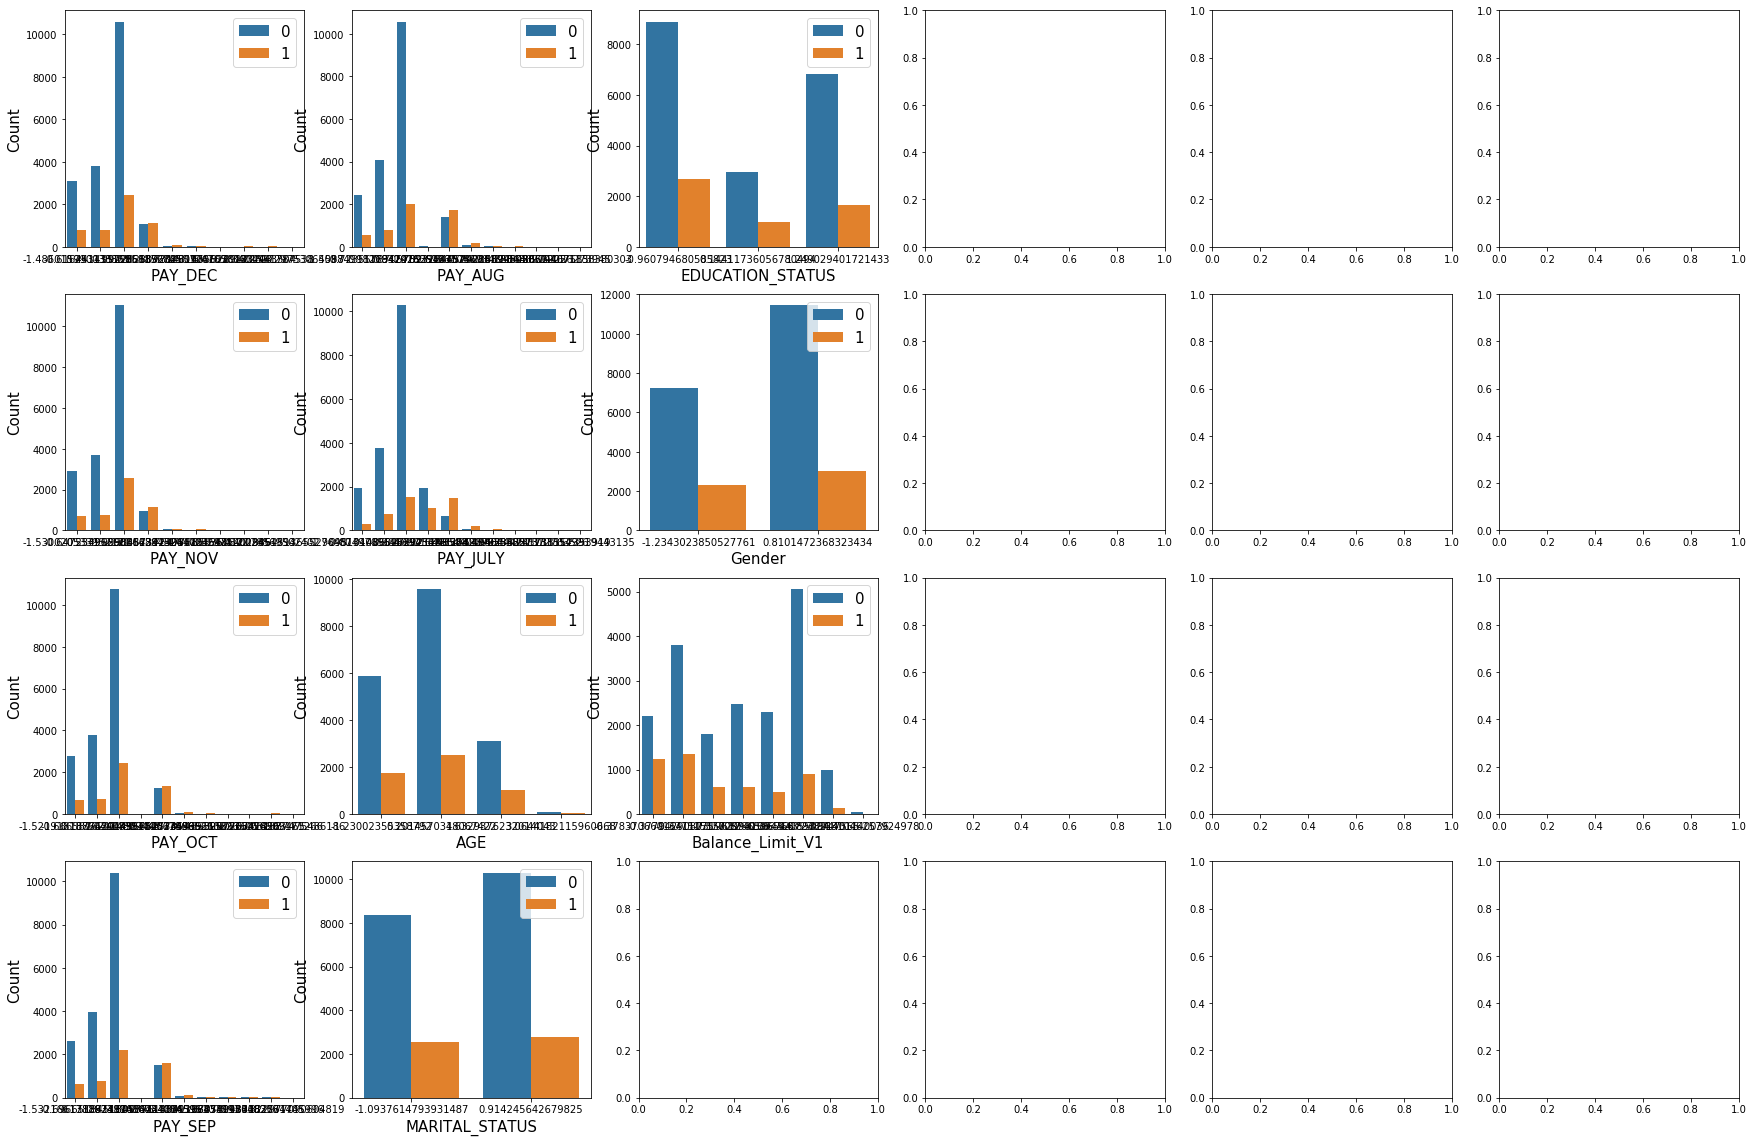

In [50]:
t=[ 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC']

cols=t[::-1]
#make the subplot size
n_cols=6
n_rows=4
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
for c in range (n_cols):
    for r in range (n_rows):
        i=c*n_rows + r #index to subplot
        ax = axs[r][c]
        if i==23:break
        sns.countplot(Std_Data_Train[cols[i]],hue=Std_Data_Train['NEXT_MONTH_DEFAULT'],ax=ax)
        ax.legend(loc="upper right",fontsize=15)
        ax.set_xlabel(cols[i],fontsize=15);
        ax.set_ylabel('Count',fontsize=15);

IndexError: list index out of range

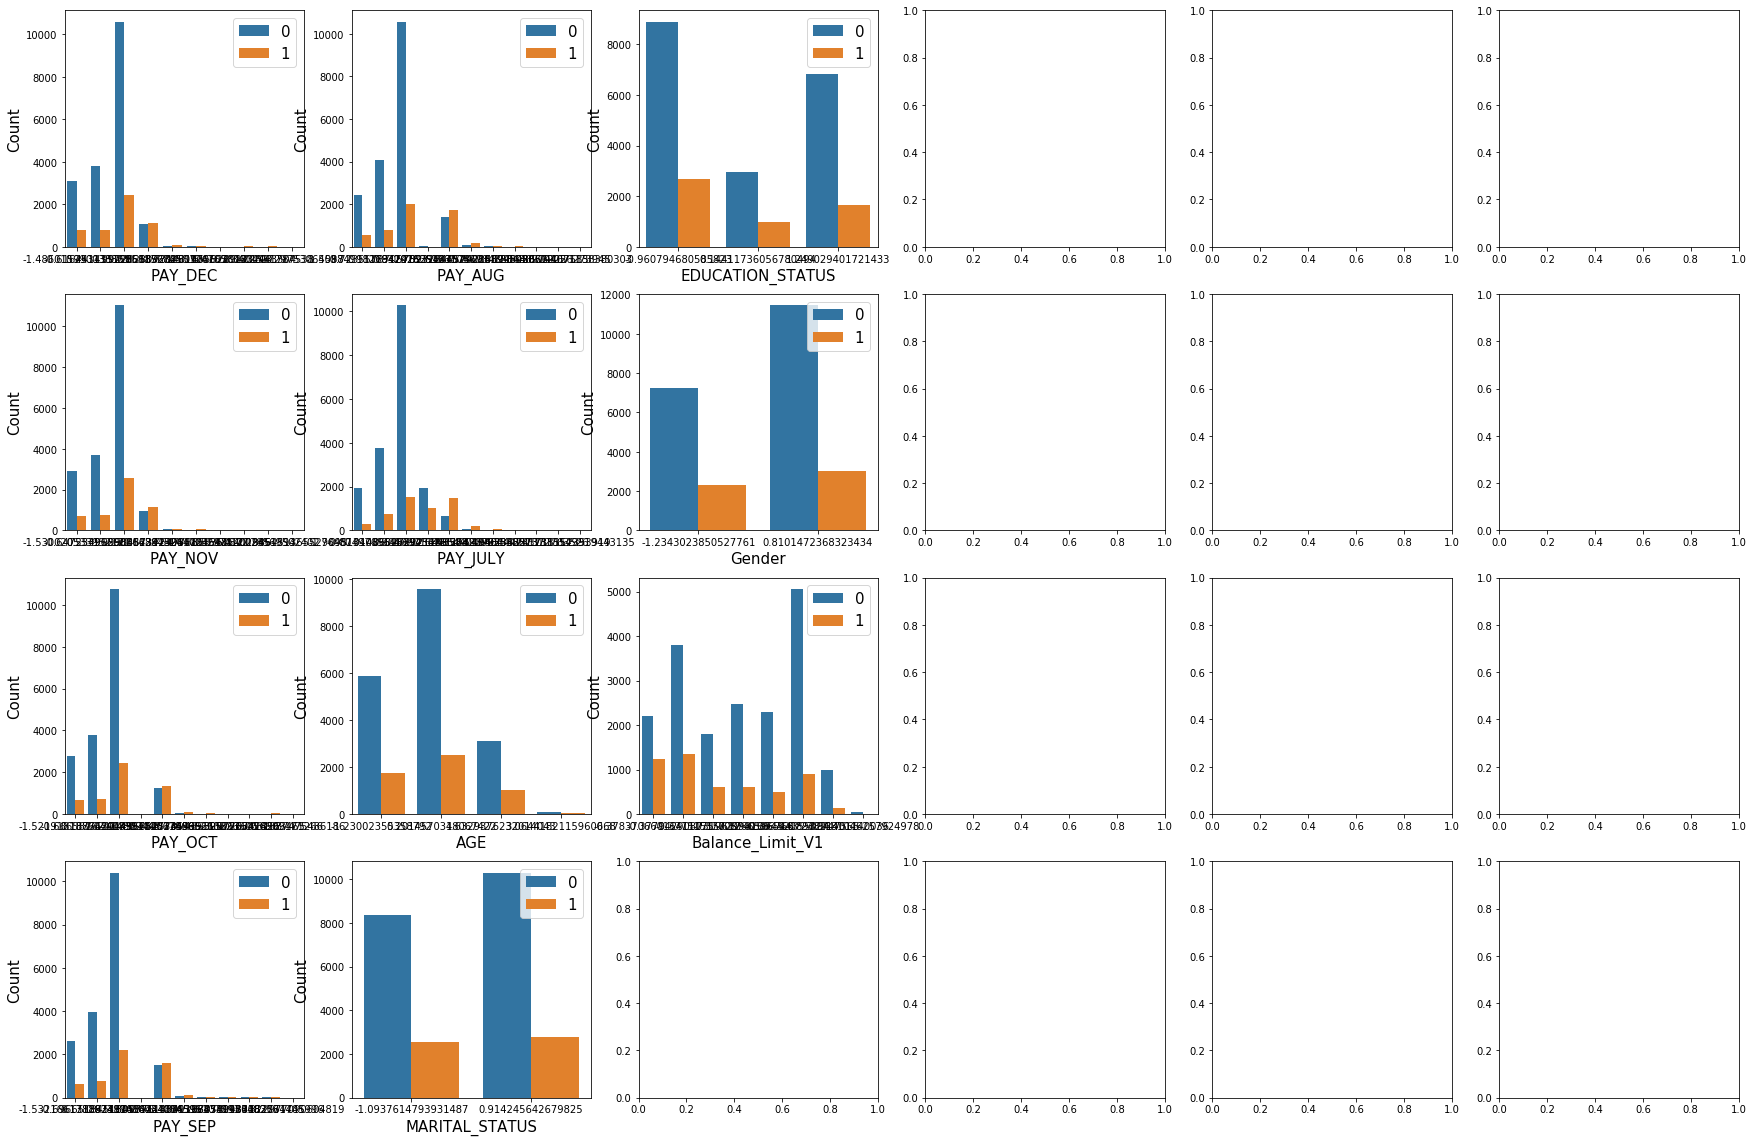

In [61]:
cols=[ 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC']
 
cols=t[::-1]
#make the subplot size
n_cols=6
n_rows=4
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
for c in range (n_cols):
    for r in range (n_rows):
        i=c*n_rows + r #index to subplot
        ax = axs[r][c]
        if i==23:break
        sns.countplot(Std_Data_Train[cols[i]],hue=Std_Data_Train['NEXT_MONTH_DEFAULT'],ax=ax)
        ax.legend(loc="upper right",fontsize=15)
        ax.set_xlabel(cols[i],fontsize=15);
        ax.set_ylabel('Count',fontsize=15);

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3, copy=True, whiten=False, svd_solver='auto', tol=0.1, 
                          iterated_power='auto', random_state=7)

principalComponents = pca.fit_transform(Std_Data_Train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3'])


principalDf = principalDf.join(Data["NEXT_MONTH_DEFAULT"])


In [88]:
# Training model

def models(X_train,Y_train,rand_num):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0,solver='lbfgs')
    log.fit(X_train,Y_train)
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=rand_num)
    svc_lin.fit(X_train,Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",gamma='auto',random_state=rand_num)
    svc_rbf.fit(X_train,Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier( criterion="entropy" ,random_state=rand_num)
    tree.fit(X_train,Y_train)
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=50,criterion="entropy")
    forest.fit(X_train,Y_train)
    
    #Use XGBClassifier
    import xgboost as xgb
    modelx=xgb.XGBClassifier(learning_rate=0.0001,random_state=rand_num)
    modelx.fit(X_train,Y_train)
    
    #Use ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    ExtraTree=ExtraTreesClassifier(n_estimators=80, max_depth=None,min_samples_split=6,random_state=rand_num)
    ExtraTree.fit(X_train,Y_train)
    
    #use AdaBoostClassifier
    from sklearn.ensemble import AdaBoostClassifier
    AdaBoost = AdaBoostClassifier(n_estimators=80)
    AdaBoost.fit(X_train,Y_train)
    
    #print the accuracy of each model
    print("[0] Logistic Regression Training Accuracy: ",log.score(X_train,Y_train))
    print("[1] K Neighbors Regression Training Accuracy: ",knn.score(X_train,Y_train))
    print("[2] SVC Linear Training Accuracy: ",svc_lin.score(X_train,Y_train))
    print("[3] SVC RBF Training Accuracy: ",svc_rbf.score(X_train,Y_train))
    print("[4] Gaussian NB Training Accuracy: ",gauss.score(X_train,Y_train))
    print("[5] Decision Tree Training Accuracy: ",tree.score(X_train,Y_train))
    print("[6] Random Forest Training Accuracy: ",forest.score(X_train,Y_train))
    print("[7] XGBClassifier Training Accuracy: ",modelx.score(X_train,Y_train))
    print("[8] ExtraTreesClassifier Training Accuracy: ",ExtraTree.score(X_train,Y_train))
    print("[9] AdaBoostClassifierr Training Accuracy: ",AdaBoost.score(X_train,Y_train))
    
    
    return  log,knn, svc_lin, svc_rbf, gauss, tree, forest,modelx,ExtraTree,AdaBoost

In [107]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3.0*iqr
    fence_high = q3+3.0*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [109]:
p=['ADVNC_TREND','PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT','PAY_NOV', 'PAY_DEC','Balance_Limit_V1','AGE']

subdata = Std_Data_Train.loc[:,p+["NEXT_MONTH_DEFAULT"]]
subData=subdata.dropna(subset=p)

# for i in p:
#      subData=remove_outlier(subData,i)

X=subData.loc[:,p]
Y=subData.loc[:,["NEXT_MONTH_DEFAULT"]]

# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


model = models(X_train,Y_train,5)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifierr"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()

    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)




Only considering ['ADVNC_TREND', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'Balance_Limit_V1', 'AGE'] 
size = 24000


[0] Logistic Regression Training Accuracy:  0.8078645833333333
[1] K Neighbors Regression Training Accuracy:  0.8146875
[2] SVC Linear Training Accuracy:  0.8033333333333333
[3] SVC RBF Training Accuracy:  0.8227604166666667
[4] Gaussian NB Training Accuracy:  0.7986979166666667
[5] Decision Tree Training Accuracy:  0.86234375
[6] Random Forest Training Accuracy:  0.86234375
[7] XGBClassifier Training Accuracy:  0.8191666666666667
[8] ExtraTreesClassifier Training Accuracy:  0.8582291666666667
[9] AdaBoostClassifierr Training Accuracy:  0.8176041666666667


Logistic Regression Testing Accuracy =  0.8102083333333333 

	TP: 329 	FP: 176 
	TN: 3560 	FN: 735



K Neighbors Testing Accuracy =  0.790625 

	TP: 401 	FP: 342 
	TN: 3394 	FN: 663



SVC Linear Testing Accuracy =  0.8072916666666666 

	TP: 362 	FP: 223 
	TN: 3513 	FN: 702



SVC RBF Testi

In [37]:
subData.describe()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,Balance_Limit_V1,NEXT_MONTH_DEFAULT
count,23881.000000,23868.000000,23878.000000,23872.000000,23870.000000,23900.000000,23963.000000,24000.000000
mean,-0.019942,-0.019082,-0.015728,-0.021005,-0.021731,-0.018109,-0.376589,0.222083
std,0.948903,0.957789,0.952732,0.934401,0.931883,0.942265,0.001695,0.415656
min,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,-1.486016,-0.378371,0.000000
25%,-0.874977,-0.723558,-0.696652,-0.666588,-0.647554,-0.616441,-0.377943,0.000000
50%,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.377087,0.000000
75%,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.374521,0.000000
max,2.684371,2.617611,2.645405,2.754735,2.882312,2.861857,-0.372382,1.000000


In [42]:
subData.dtypes

PAY_JULY              float64
PAY_AUG               float64
PAY_SEP               float64
PAY_OCT               float64
PAY_NOV               float64
PAY_DEC               float64
Balance_Limit_V1      float64
NEXT_MONTH_DEFAULT      int64
dtype: object

In [110]:

X=Std_Data_Test.loc[:,p]
pred= model[3].predict(X)


In [112]:

np.savetxt("output_F1.csv", pred, delimiter=",")